<a href="https://colab.research.google.com/github/Pranavvr/Credit_Approval_Prediction/blob/main/Credit_approval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/Drive')

Mounted at /content/Drive


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#Visualization packaes
import matplotlib.pyplot as plt
import seaborn as sns

#Machine learning
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score,recall_score, f1_score
from imblearn.over_sampling import SMOTE

In [ ]:
df=pd.read_csv('/content/Drive/MyDrive/ML Research/credit_risk_dataset.csv')

In [ ]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [ ]:
#Dataset size
data_rows = df.shape[0]
data_colunms = df.shape[1]

print(f'This dataset have {data_rows} rows and {data_colunms} columns.')

This dataset have 32581 rows and 12 columns.


In [ ]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [ ]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


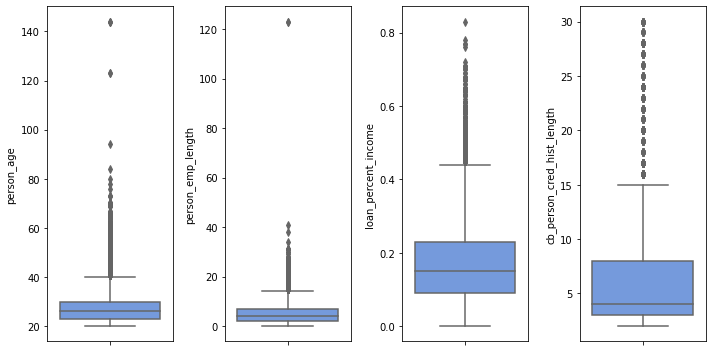

In [ ]:
features = ['person_age','person_emp_length','loan_percent_income','cb_person_cred_hist_length']
plt.figure(figsize=(10,5))
for i in range(0,len(features)):
    plt.subplot(1, len(features), i + 1)
    sns.boxplot(y=df[features[i]], color='CornflowerBlue', orient='v')
    plt.tight_layout()


<Figure size 720x360 with 0 Axes>

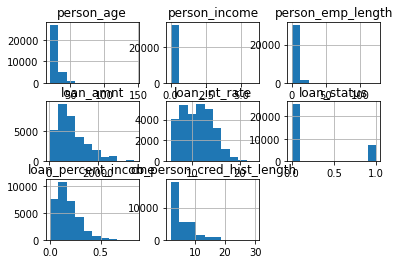

In [ ]:
plt.figure(figsize=(10,5))
df.hist()
plt.show()

In [ ]:
df.loan_status.value_counts()

0    25473
1     7108
Name: loan_status, dtype: int64

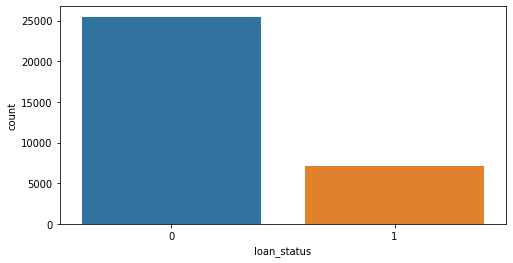

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x='loan_status', data=df)
plt.show()

In [ ]:
var_categorical = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
for i in var_categorical:
    print(f'Total row of variable {i}')
    print(df[i].value_counts())
    print()

Total row of variable person_home_ownership
RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: person_home_ownership, dtype: int64

Total row of variable loan_intent
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: loan_intent, dtype: int64

Total row of variable loan_grade
A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: loan_grade, dtype: int64

Total row of variable cb_person_default_on_file
N    26836
Y     5745
Name: cb_person_default_on_file, dtype: int64



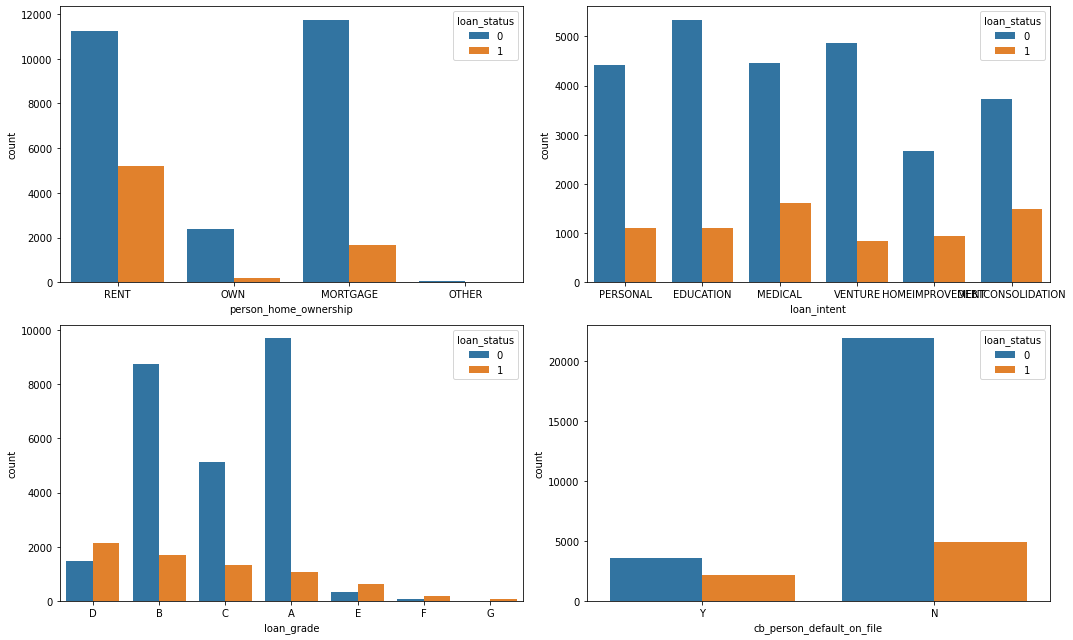

In [ ]:
plt.figure(figsize=(15,9))
for i in range(0,len(var_categorical)):
    plt.subplot(2,2,i + 1)
    sns.countplot(data= df, x = var_categorical[i], hue='loan_status')
    plt.tight_layout()

In [ ]:
#Looking for the outliers
df['person_age'].sort_values(ascending=False).head(10)

81       144
32297    144
183      144
747      123
575      123
32416     94
32506     84
32422     80
32355     78
32534     76
Name: person_age, dtype: int64

In [ ]:
df['person_emp_length'].sort_values(ascending=False).head(10)

0        123.0
210      123.0
32355     41.0
32515     38.0
32428     34.0
31866     31.0
32263     31.0
31867     31.0
30914     31.0
32562     30.0
Name: person_emp_length, dtype: float64

In [ ]:
df.drop(df.loc[df['person_emp_length'] == 123].index, inplace=True)

In [ ]:
df.loc[df['person_emp_length'] == 123]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length


In [ ]:
df.drop(df.loc[df['person_age'] >= 123].index, inplace=True)
df.loc[df['person_age'] >= 123].index

Int64Index([], dtype='int64')

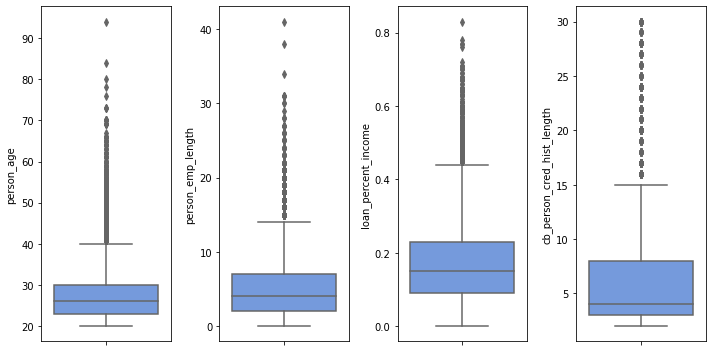

In [ ]:
#Confirm there is no outliers
features = ['person_age','person_emp_length','loan_percent_income','cb_person_cred_hist_length']
plt.figure(figsize=(10,5))
for i in range(0,len(features)):
    plt.subplot(1, len(features), i + 1)
    sns.boxplot(y=df[features[i]], color='CornflowerBlue', orient='v')
    plt.tight_layout()

In [ ]:
#After drop outliers
mean_person_emp_length = df['person_emp_length'].mean()
mean_loan_int_rate = df['loan_int_rate'].mean()

In [ ]:
#Fill na with mean
df['person_emp_length'] = df['person_emp_length'].fillna(mean_person_emp_length)

In [ ]:
df['person_emp_length'].isna().sum()

0

In [ ]:
df['loan_int_rate'] = df['loan_int_rate'].fillna(mean_loan_int_rate)
df['loan_int_rate'].isna().sum()

0

In [ ]:
def categorical_variables(df):
    object_cols = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
    label_encoder = LabelEncoder()
    for col in object_cols:
        df[col] = label_encoder.fit_transform(df[col])
    return df

In [ ]:
credit_df = categorical_variables(df)

In [ ]:
credit_df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,2,5.0,1,1,1000,11.14,0,0.10,0,2
2,25,9600,0,1.0,3,2,5500,12.87,1,0.57,0,3
3,23,65500,3,4.0,3,2,35000,15.23,1,0.53,0,2
4,24,54400,3,8.0,3,2,35000,14.27,1,0.55,1,4
5,21,9900,2,2.0,5,0,2500,7.14,1,0.25,0,2


In [ ]:
X = credit_df.drop('loan_status', axis=1)
y = credit_df['loan_status']

seed = 27
size = 0.3
X_train, X_test, Y_train, y_test = train_test_split(X, y, test_size=size, random_state=seed)

In [ ]:
scaler = MinMaxScaler().fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

In [ ]:
#X_train scaled
X_train_norm

array([[0.04054054, 0.03733205, 0.        , ..., 0.16883117, 0.        ,
        0.03571429],
       [0.02702703, 0.02308693, 0.        , ..., 0.38961039, 0.        ,
        0.07142857],
       [0.16216216, 0.01670118, 0.66666667, ..., 0.14285714, 0.        ,
        0.25      ],
       ...,
       [0.02702703, 0.0172533 , 0.66666667, ..., 0.16883117, 0.        ,
        0.07142857],
       [0.13513514, 0.01473634, 1.        , ..., 0.15584416, 0.        ,
        0.28571429],
       [0.02702703, 0.02868674, 1.        , ..., 0.18181818, 0.        ,
        0.03571429]])

In [ ]:
#X_test scaled
X_test_norm

array([[0.24324324, 0.00652329, 0.66666667, ..., 0.07792208, 1.        ,
        0.39285714],
       [0.08108108, 0.00785938, 1.        , ..., 0.25974026, 1.        ,
        0.07142857],
       [0.08108108, 0.06974807, 0.        , ..., 0.18181818, 1.        ,
        0.        ],
       ...,
       [0.21621622, 0.02750783, 0.        , ..., 0.32467532, 0.        ,
        0.53571429],
       [0.14864865, 0.01571876, 1.        , ..., 0.28571429, 0.        ,
        0.21428571],
       [0.17567568, 0.01540438, 0.        , ..., 0.23376623, 0.        ,
        0.10714286]])

In [ ]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier

In [ ]:
print('Distribution target class before oversample: ', Counter(Y_train))

Distribution target class before oversample:  Counter({0: 17813, 1: 4988})


In [ ]:
oversample= SMOTE(sampling_strategy=1, random_state=42, k_neighbors=3)
X_train_over, Y_train_over = oversample.fit_resample(X_train_norm, Y_train)
print('Distribuition target class after oversample: ', Counter(Y_train_over))

Distribuition target class after oversample:  Counter({0: 17813, 1: 17813})


In [ ]:
rfc_clf = RandomForestClassifier(n_estimators=100)
rfc_clf.fit(X_train, Y_train)

RandomForestClassifier()

In [ ]:
Y_predict_clf = rfc_clf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, Y_predict_clf)
precision = precision_score(y_test, Y_predict_clf)
recall = recall_score(y_test, Y_predict_clf)
fscore = f1_score(y_test, Y_predict_clf)

print('Accuracy predict: %.2f%%' % (accuracy * 100.0))
print('Precision: %.2f%%' % (precision * 100.0))
print('Recall: %.2f%%' % (recall * 100.0))
print('F1_score: %.2f%%' % (fscore * 100.0))

Accuracy predict: 92.89%
Precision: 95.24%
Recall: 70.74%
F1_score: 81.18%
